In [0]:

!pip install -q matplotlib-venn

In [0]:
import imageio
#import dicom
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from skimage import morphology
from skimage import measure
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np
import scipy.ndimage as ndi 
import os

%matplotlib inline


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
uploaded = files.upload()

Saving xr_skull.dcm to xr_skull.dcm


In [0]:
!pwd

/content


In [0]:
os.chdir("/content/drive/My Drive/Colab Notebooks/sunnybrook-cardiac-mr/SCD2001_006")
dcm_list = os.listdir(os.getcwd())
dcm_list
#dcm_image for item in dcm_list 

['SCD2001_MR_101.dcm',
 'SCD2001_MR_104.dcm',
 'SCD2001_MR_105.dcm',
 'SCD2001_MR_106.dcm',
 'SCD2001_MR_102.dcm',
 'SCD2001_MR_107.dcm',
 'SCD2001_MR_108.dcm',
 'SCD2001_MR_103.dcm',
 'SCD2001_MR_109.dcm',
 'SCD2001_MR_110.dcm',
 'SCD2001_MR_113.dcm',
 'SCD2001_MR_111.dcm',
 'SCD2001_MR_119.dcm',
 'SCD2001_MR_112.dcm',
 'SCD2001_MR_114.dcm',
 'SCD2001_MR_117.dcm',
 'SCD2001_MR_120.dcm',
 'SCD2001_MR_116.dcm',
 'SCD2001_MR_115.dcm',
 'SCD2001_MR_118.dcm']

uint8


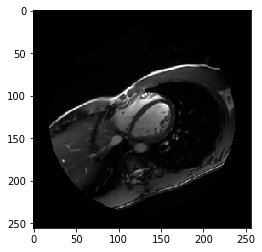

SCD2001_MR_117.dcm


Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.4'),
      ('SOPInstanceUID', '2.16.124.113543.6006.99.3228306400356655392'),
      ('StudyDate', '20120000'),
      ('SeriesDate', '20120000'),
      ('AcquisitionDate', '20120000'),
      ('ContentDate', '20120000'),
      ('StudyTime', '124424.000000 '),
      ('SeriesTime', '130512'),
      ('AcquisitionTime', '130801.514566 '),
      ('ContentTime', '130811.354260 '),
      ('Modality', 'MR'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', ''),
      ('SeriesDescription', ''),
      ('PatientName', 'SCD0002001'),
      ('PatientID', 'SCD0002001'),
      ('PatientBirthDate', '00000000'),
      ('PatientSex', ''),
      ('SliceSpacing', 10.0),
      ('StudyInstanceUID', '2.16.124.113543.6006.99.2708664770257691226'),
      ('SeriesInstanceUID', '2.16.124.113543.6006.99.2706040441424892637'),
      ('SeriesNumber', 900),
      ('AcquisitionNumber', 1),
      ('

In [0]:
im = imageio.imread(dcm_list[15])
im = im.astype('uint8')
print(im.dtype)
#fig,plt = plt.subplots()
plt.imshow(im, cmap='gray')
plt.show()
'''print(im.min())
print(im.max())
im_255 = im.astype('uint8')
print(im_255.min())
print(im_255.max())
print(im_255.dtype)'''
print(dcm_list[15])
im.meta

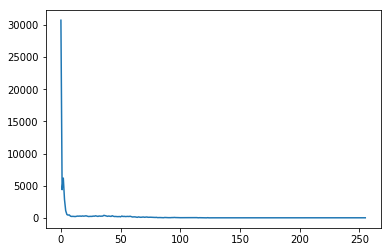

"mask = im >150\nplt.imshow(mask, cmap='gray')\nplt.show()\n\nlabels, nlabels = ndi.label(mask)\nnlabels\nplt.imshow(labels, cmap='rainbow')\nplt.show()\n"

In [0]:
hist = ndi.histogram(im_filt, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

'''mask = im >150
plt.imshow(mask, cmap='gray')
plt.show()

labels, nlabels = ndi.label(mask)
nlabels
plt.imshow(labels, cmap='rainbow')
plt.show()
'''


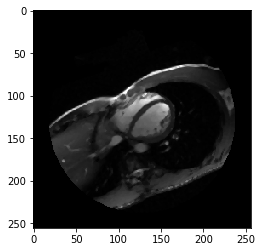

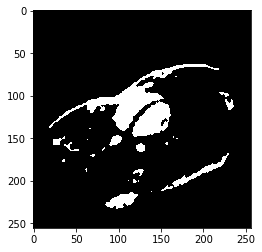

Number of Labels: 26


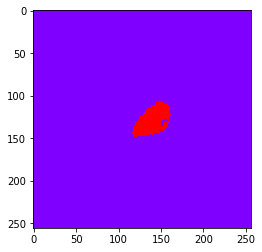

(slice(107, 149, None), slice(116, 162, None))


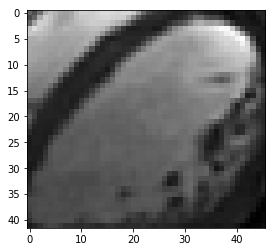

In [0]:
'''im_filter = ndi.gaussian_filter(im, sigma=1)
plt.imshow(im_filter, cmap='gray')
plt.show()'''

#suppresing noise from image
im_filt = ndi.median_filter(im, size=3)
plt.imshow(im_filt, cmap='gray')
plt.show()

#selecting high intensity pixels
mask_start = np.where(im_filt >60 , 1, 0)
mask = ndi.binary_closing(mask_start)
plt.imshow(mask, cmap='gray')
plt.show()

#labeling the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Number of Labels:', nlabels)

# mask overlayed on image
lv_val = labels[128, 128]
lv_val = 5
#overlay
lv_mask = np.where(labels == lv_val, 1, 0)
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

#find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print(bboxes[0])
plt.imshow(im[bboxes[0]], cmap='gray')
plt.show()


In [0]:
print(labels.shape)
labels[128,128]
1 in labels

(256, 256)


True

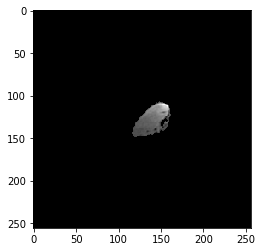

array([5, 5, 5, ..., 5, 5, 5], dtype=int32)

In [0]:
im_label = np.where((labels == 5), im, 0)
plt.imshow(im_label, cmap = 'gray')
plt.show()

labels[labels == 5]
 

In [0]:
ndi.find_objects(lv_mask)

[(slice(107, 149, None), slice(116, 162, None))]

In [0]:
print(os.getcwd())
vol = imageio.volread(os.getcwd())
vol.meta


/content/drive/My Drive/Colab Notebooks/sunnybrook-cardiac-mr/SCD2001_005
Reading DICOM (examining files): 1/21 files (4.8%)3/21 files (14.3%)4/21 files (19.0%)5/21 files (23.8%)6/21 files (28.6%)7/21 files (33.3%)8/21 files (38.1%)9/21 files (42.9%)10/21 files (47.6%)11/21 files (52.4%)12/21 files (57.1%)13/21 files (61.9%)14/21 files (66.7%)15/21 files (71.4%)16/21 files (76.2%)18/21 files (85.7%)19/21 files (90.5%)20/21 files (95.2%)21/21 files (100.0%)21/21 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 21/21  (100.0%)


Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.4'),
      ('SOPInstanceUID', '2.16.124.113543.6006.99.05920778794696579986'),
      ('StudyDate', '20120000'),
      ('SeriesDate', '20120000'),
      ('AcquisitionDate', '20120000'),
      ('ContentDate', '20120000'),
      ('StudyTime', '124424.000000 '),
      ('SeriesTime', '130512'),
      ('AcquisitionTime', '130832.246826 '),
      ('ContentTime', '130841.873449 '),
      ('Modality', 'MR'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('StudyDescription', ''),
      ('SeriesDescription', ''),
      ('PatientName', 'SCD0002001'),
      ('PatientID', 'SCD0002001'),
      ('PatientBirthDate', '00000000'),
      ('PatientSex', ''),
      ('SliceSpacing', 10.0),
      ('StudyInstanceUID', '2.16.124.113543.6006.99.2708664770257691226'),
      ('SeriesInstanceUID', '2.16.124.113543.6006.99.2706040441424892637'),
      ('SeriesNumber', 900),
      ('AcquisitionNumber', 1),
      (

In [0]:
# Calculate volume of the left ventricle
vol.meta['sampling']

d0, d1, d2 = vol.meta['sampling']
#unit volume per voxel
dvoxel = d1*d2


#number of voxels of label 5
nvoxels=ndi.sum(5, labels, index=1)

#Have to find volume of the left ventricle 
volume = nvoxels * dvoxel

#Volume of left ventricle in mm3 
print(int(volume))



24009


**Conclusion**:  If we calculate volume of voxels for left ventricle per time point, subsequently we will get a list.
Taking min value and max value we can get ejection fraction.



```
# Ejection Fraction = (LVmax -LVmin)/LVmax
```                       

